### Cartopy is commented out import if correct map projections are desired

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import xarray as xr
import calendar, time
#import cartopy.crs as ccrs

In [2]:
%matplotlib notebook
mpl.style.use('seaborn-muted')
mpl.rc('font', family ='Segoe UI Symbol')

In [3]:
MAX_PRESSURE = 300
top_map_extent = [153.8, 155.2, -26.8, -27.8]
bottom_map_extent = [153.6, 155.4, -26.6, -28]

In [4]:
mooring_sites = [[-27.102, 155.299, 'M6_4800'], [-27.206, 154.648, 'M5_4700'], 
                 [-27.249, 154.297, 'M4_4200'], [-27.283, 154.137, 'M3_3200'],
                 [-27.318, 154.001, 'M2_2000'], [-27.329, 153.898, 'M1_500']]

## Load up the figure and then go through to populate the charts

<IPython.core.display.Javascript object>


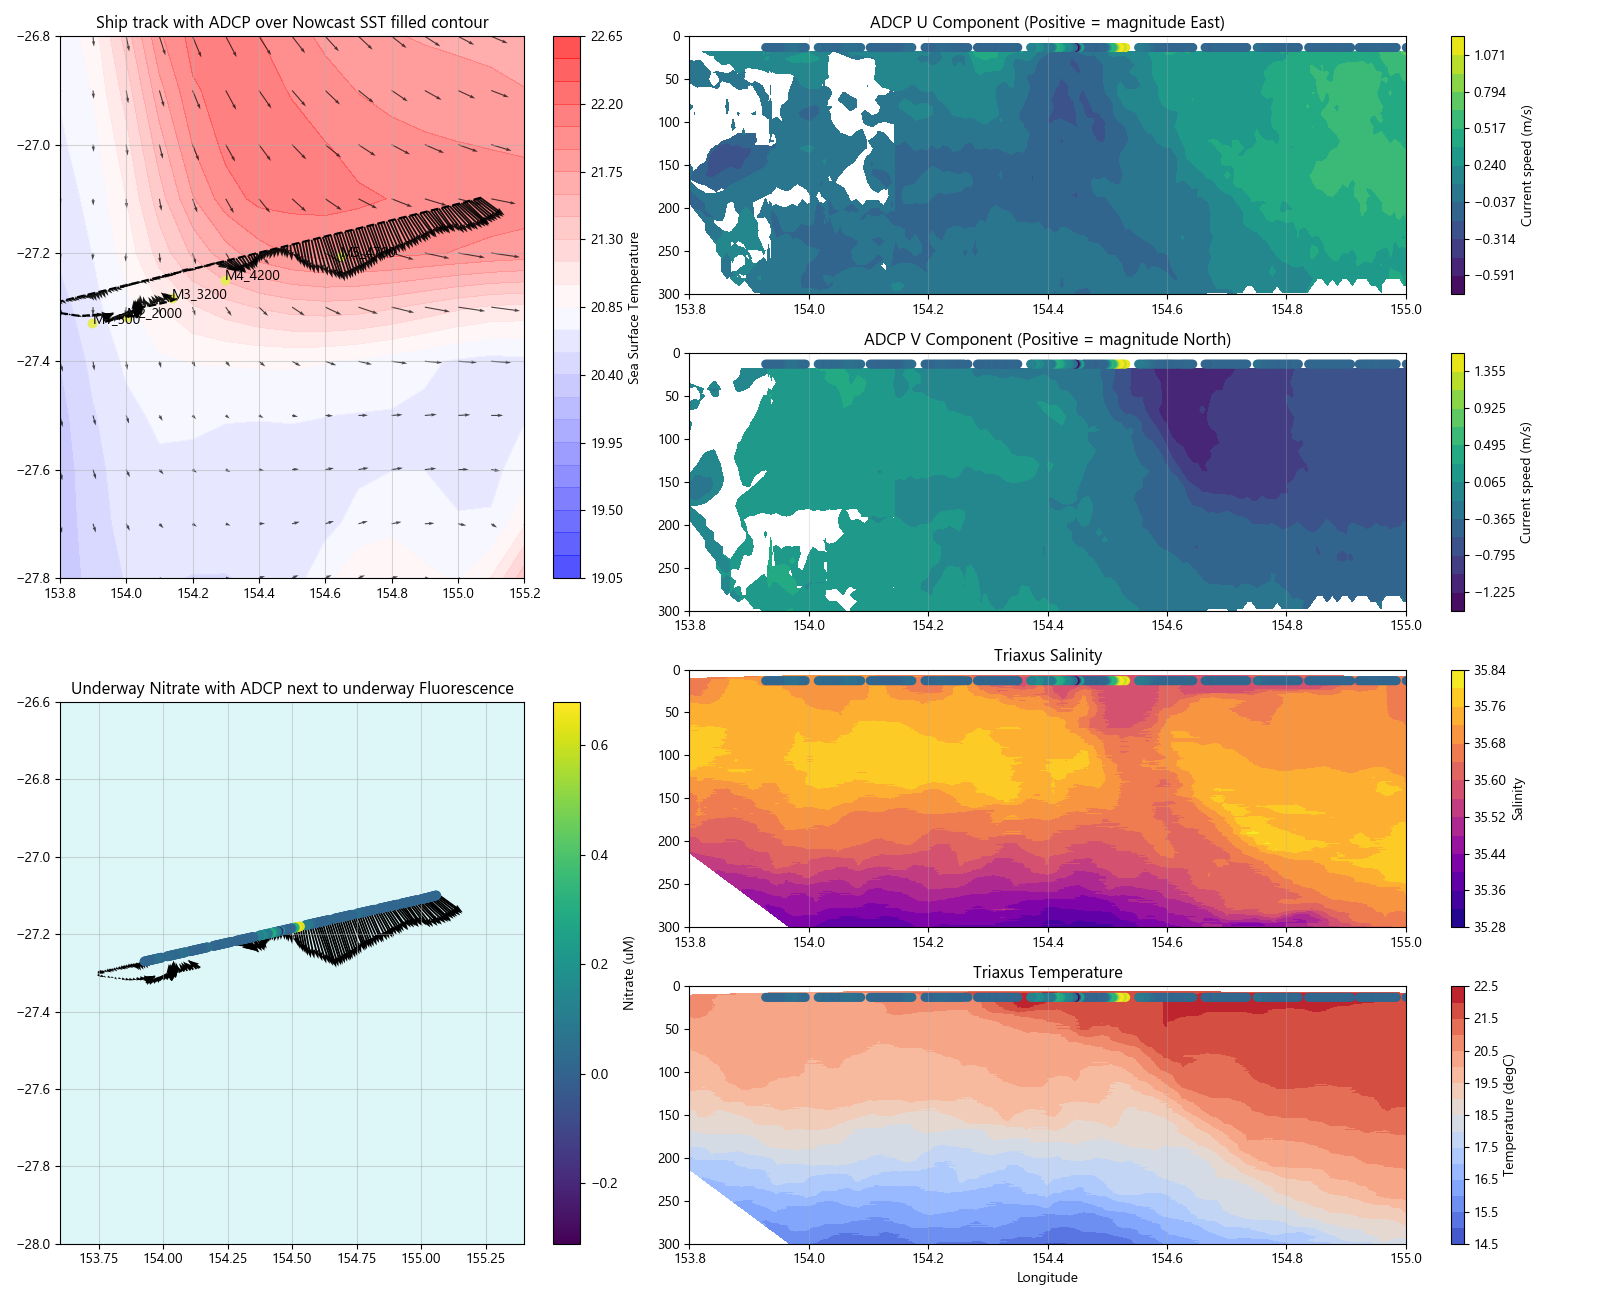

In [70]:
fig = plt.figure(figsize=(16,13))
fig.set_tight_layout(tight=True)

#### Uncomment cartopy import and change the map plots if a proportional map is required

In [71]:
#map_plot = plt.subplot2grid((2, 5), (0, 0), projection=ccrs.PlateCarree(), colspan=2)
#nut_map = plt.subplot2grid((2, 5), (1, 0), projection=ccrs.PlateCarree(), colspan=2)

map_plot = plt.subplot2grid((2, 5), (0, 0), colspan=2)
nut_map = plt.subplot2grid((2, 5), (1, 0), colspan=2)
adcp_u_plot = plt.subplot2grid((4,5), (0, 2), colspan=3)
adcp_v_plot = plt.subplot2grid((4,5), (1, 2), colspan=3)
triaxus_salt = plt.subplot2grid((4,5), (2, 2), colspan=3)
triaxus_temp = plt.subplot2grid((4,5), (3, 2), colspan=3)

#### !!!! Run to set the limits of the map plots to the specified extents, but only if cartopy geo axes isnt used otherwise use the one below

In [72]:
map_plot.set_xlim(top_map_extent[0], top_map_extent[1])
map_plot.set_ylim(top_map_extent[3], top_map_extent[2])
nut_map.set_xlim(bottom_map_extent[0], bottom_map_extent[1])
nut_map.set_ylim(bottom_map_extent[3], bottom_map_extent[2])

(-28, -26.6)

#### !!!! Run cell below if map plots are of cartopy geoaxes type

In [57]:
nut_map.set_extent(top_map_extent)
map_plot.set_extent(bottom_map_extent)

x_ticks = np.linspace(top_map_extent[0], top_map_extent[1], 5)
y_ticks = np.linspace(top_map_extent[2], top_map_extent[3], 5)

x_ticks2 = np.linspace(bottom_map_extent[0], bottom_map_extent[1], 5)
y_ticks2 = np.linspace(bottom_map_extent[2], bottom_map_extent[3], 5)

map_plot.set_xticks([153.6, 153.8, 154, 154.2, 154.4, 154.6, 154.8, 155, 155.2, 155.4])
map_plot.set_yticks(y_ticks2)
nut_map.set_xticks(x_ticks)
nut_map.set_yticks(y_ticks)

AttributeError: 'AxesSubplot' object has no attribute 'set_extent'

## Load data in - you can just run all cells below this for the plots 

In [93]:
# Nowcast on Science drive - "\\science.investigator.csiro.au\voyages\current\science\nowcast\20190916\ocean_fc_2019091612_024_surface.nc"
nowcast = xr.open_dataset(r"C:\Users\she384\Documents\in2019_v05\Exploratory\Nowcast\ocean_fc_2019091612_024_surface.nc")
# Triaxus on Science drive - "\\science.investigator.csiro.au\voyages\current\triaxus\processing\in2019_v05\seasave\in2019_v05_02\in2019_v05_02_002.nc"
triaxus = xr.open_dataset(r"C:\Users\she384\Documents\in2019_v05\Exploratory\Triaxus\in2019_v05_02_002.nc")
# ADCP on science drive - "\\science.investigator.csiro.au\voyages\current\adcp\uhdas\in2019_v05\proc\os150nb\contour\os150nb.nc"
adcp = xr.open_dataset(r"C:\Users\she384\Documents\in2019_v05\Exploratory\150ACDP\os150nb.nc")
# RVI UWY on science drive - "\\science.investigator.csiro.au\voyages\current\underway\in2019_v05uwy.nc"
rvi_uwy = xr.open_dataset(r"C:\Users\she384\Documents\in2019_v05\Exploratory\Underway\in2019_v05uwy.nc")
# Nitrate UWY on science drive - "\\science.investigator.csiro.au\voyages\current\science\DATA\UnderwayNutrients\processed\in2019_v05.nc"
nuts_uwy = xr.open_dataset(r'C:\Users\she384\Documents\in2019_v05\Exploratory\AA100\in2019_v05.nc')

Find the start time of the transect - get that from triaxus

In [74]:
triaxus_start_time = calendar.timegm(time.strptime(triaxus.start_time[:20], "%b %d %Y %H:%M:%S"))

Sort out the RVI underway data, determine times and get the data near the triaxus transect

In [75]:
epochdate = rvi_uwy.Epoch
datetoconvert = epochdate[-22:-3]
uwyformat = '%Y-%m-%d %H:%M:%S'
ts = time.strptime(datetoconvert, uwyformat)
epochtimestamp = calendar.timegm(ts)
starttime = epochtimestamp + float(epochdate[0:8])
rvi_lat = rvi_uwy.latitude.values

rvi_times = np.array([(starttime + (i * 5)) for i, x in enumerate(rvi_lat)])

rvi_uwy_start_index = np.where(rvi_times > triaxus_start_time)

In [76]:
rvi_lat = rvi_uwy.latitude[rvi_uwy_start_index[0][0]:]
rvi_lon = rvi_uwy.longitude[rvi_uwy_start_index[0][0]:]
rvi_fluoro = rvi_uwy.fluorescence[rvi_uwy_start_index[0][0]:].values

Got to clean up the RVI data quickly

In [77]:
F_temp_df = pd.DataFrame(list(zip(rvi_fluoro, rvi_lon, rvi_lat)), columns=['F', 'lon', 'lat'])

F_df = F_temp_df.loc[(F_temp_df['F'] > 0) & (F_temp_df['F'] < 5)]

F_to_plot = F_df['F'].values
Flon_to_plot = F_df['lon'].values
Flat_to_plot = F_df['lat'].values

F_depths = [25 for x in Flon_to_plot]

#### Sort out the Nowcast data and plot

In [78]:
nowcast_lon = nowcast.xu_ocean
nowcast_lat = nowcast.yu_ocean
nowcast_usurf = nowcast.usurf[0, :, :]
nowcast_vsurf = nowcast.vsurf[0, :, :]
nowcast_sst = nowcast.sst[0, :, :]

In [79]:
ss_temp = map_plot.contourf(nowcast_lon, nowcast_lat, nowcast_sst, levels=25, cmap = 'bwr', alpha=0.7)
map_plot.quiver(nowcast_lon, nowcast_lat, nowcast_usurf, nowcast_vsurf, alpha=0.7, scale = 15)

sst_cb = plt.colorbar(ss_temp, ax=map_plot)
sst_cb.set_label('Sea Surface Temperature')
sst_cb.set_alpha(1)

#### Plot the RVI underway data

In [80]:
map_plot.set_title('Ship track with ADCP over Nowcast SST filled contour')
for x in enumerate(mooring_sites):
    map_plot.plot(x[1][1], x[1][0], marker='o', color='#E6EB58', lw=0)
    map_plot.annotate(x[1][2], (x[1][1], x[1][0]))

map_plot.plot(rvi_lon, rvi_lat, lw=1.5, linestyle='--', color='black')
map_plot.grid(alpha=0.5, zorder=0)

#### Plot the underway nitrate data

In [81]:
nut_time = nuts_uwy.time.values
nut_start_index = np.where(nut_time > triaxus_start_time)
nut_lat = nuts_uwy.latitude[nut_start_index[0][0]:]
nut_lon = nuts_uwy.longitude[nut_start_index[0][0]:]
nut_nit = nuts_uwy.nitrate[nut_start_index[0][0]:]

In [82]:
nut_map.set_title('Underway Nitrate with ADCP next to underway Fluorescence')
nts = nut_map.scatter(nut_lon, nut_lat, c=nut_nit, zorder=4)
nut_cb = plt.colorbar(nts, ax=nut_map)
nut_cb.set_label('Nitrate (uM)')
nut_map.set_facecolor('#DDF7F9')
nut_map.grid(alpha=0.5, zorder=0)

#### Pull out the adcp data and plot on separate for each directions

In [83]:
adcp_time = adcp.time.values
adcp_time_epoch = (adcp_time.astype('uint64') / 1e9).astype('uint32')

adcp_start_index = np.where(adcp_time_epoch > triaxus_start_time)

adcp_lon = adcp.lon[adcp_start_index[0][0]:].values
adcp_lat = adcp.lat[adcp_start_index[0][0]:].values
adcp_depth = adcp.depth[0, :]

adcp_v = adcp.v[adcp_start_index[0][0]:, :].values
adcp_u = adcp.u[adcp_start_index[0][0]:, :].values

Also pull out the surface currents to overlay on the maps

In [84]:
adcp_v_surf = adcp.v[adcp_start_index[0][0]:, 0].values
adcp_u_surf = adcp.u[adcp_start_index[0][0]:, 0].values

Use pandas dataframes to quick QC within limits

In [85]:
qc_dataframe = pd.DataFrame(list(zip(adcp_lon, adcp_lat, adcp_v_surf, adcp_u_surf)), columns=['lon', 'lat', 'v', 'u'])
qc_dataframe = qc_dataframe.loc[(qc_dataframe['v'] >= -1.44) & (qc_dataframe['v'] <= 1.57)]
qc_dataframe = qc_dataframe.loc[(qc_dataframe['u'] >= -0.72) & (qc_dataframe['u'] <= 1.22)]

adcp_lon_surf = qc_dataframe['lon'].values
adcp_lat_surf = qc_dataframe['lat'].values
adcp_u_surf = qc_dataframe['u'].values
adcp_v_surf = qc_dataframe['v'].values

#### Plot ADCP data onto maps

In [86]:
map_plot.quiver(adcp_lon_surf, adcp_lat_surf, adcp_u_surf, adcp_v_surf, zorder=5, alpha=0.9)
nut_map.quiver(adcp_lon_surf, adcp_lat_surf, adcp_u_surf, adcp_v_surf)

#### Prep and plot adcp data on sections

In [87]:
v = np.linspace(-.73, 1.21, 15, endpoint=True)

u_plot = adcp_u_plot.contourf(adcp_lon, adcp_depth, adcp_u.T, v)

adcp_u_plot.set_title('ADCP U Component (Positive = magnitude East)')
adcp_u_cb = plt.colorbar(u_plot, ax=adcp_u_plot)
adcp_u_cb.set_label('Current speed (m/s)')
adcp_u_plot.invert_yaxis()
adcp_u_plot.set_ylim(300, 0)
adcp_u_plot.xaxis.grid(alpha=0.3)
adcp_u_plot.set_xlim(153.8, 155)

(153.8, 155)

In [88]:
v = np.linspace(-1.44, 1.57, 15, endpoint=True)

av = adcp_v_plot.contourf(adcp_lon, adcp_depth, adcp_v.T, v)

adcp_v_plot.set_title('ADCP V Component (Positive = magnitude North)')
av_cb = plt.colorbar(av, ax=adcp_v_plot)
av_cb.set_label('Current speed (m/s)')
adcp_v_plot.invert_yaxis()
adcp_v_plot.set_ylim(300, 0)
adcp_v_plot.xaxis.grid(alpha=0.3)
adcp_v_plot.set_xlim(153.8, 155)

(153.8, 155)

#### Plot the triaxus data of temperature and salinity

In [89]:
triaxus_salt.set_title('Triaxus Salinity')
ts = triaxus_salt.tricontourf(triaxus.LONGITUDE, triaxus.PRES, triaxus.PSAL, levels=15, cmap='plasma')
triaxus_salt_cb = plt.colorbar(ts, ax=triaxus_salt)
triaxus_salt_cb.set_label('Salinity')
triaxus_salt.invert_yaxis()
triaxus_salt.set_ylim(300, 0)
triaxus_salt.xaxis.grid(alpha=0.3)
#ts2 = triaxus_salt.contour(triaxus.LONGITUDE, triaxus.PRES, triaxus.PSAL, levels=[35.5, 35.60, 35.70], colors='black', linewidths=0.5)
triaxus_salt.set_xlim(153.8, 155)

(153.8, 155)

In [90]:
triaxus_temp.set_title('Triaxus Temperature')
tt = triaxus_temp.tricontourf(triaxus.LONGITUDE, triaxus.PRES, triaxus.TEMP, levels=15, cmap='coolwarm')
triaxus_temp_cb = plt.colorbar(tt, ax=triaxus_temp)
triaxus_temp_cb.set_label('Temperature (degC)')
triaxus_temp.invert_yaxis()
triaxus_temp.set_ylim(300, 0)
triaxus_temp.set_xlabel('Longitude')
triaxus_temp.xaxis.grid(alpha=0.3)
triaxus_temp.set_xlim(153.8, 155)

(153.8, 155)

#### For reference plot the underway nitrate onto the section plots to see where it matches up

In [91]:
depth_gen = [13 for x in nut_lon]
adcp_u_plot.scatter(nut_lon, depth_gen, c=nut_nit, s=30)
adcp_v_plot.scatter(nut_lon, depth_gen, c=nut_nit, s=30)
triaxus_salt.scatter(nut_lon, depth_gen, c=nut_nit, s=30)
triaxus_temp.scatter(nut_lon, depth_gen, c=nut_nit, s=30)

# uncomment so it autosaves each time its run

In [92]:
#plt.savefig('C:/Users/she384/Documents/in2019_v05/' + str(time.time()) +'.png' , dpi=300)